# Lernen im mehrschichtigen Netz

### Gradientenabstieg

Input x = 0.500000, Gewünschter Output y = 0.20
Iter	x	w	net i	a	y_hat	y	E		E'		w delta
0	0.5	 -4.00	-2.00	 0.12	 0.12	0.20	0.003264	-0.008483	0.008483
10	0.5	 -3.92	-1.96	 0.12	 0.12	0.20	0.002912	-0.008272	0.008272
20	0.5	 -3.83	-1.92	 0.13	 0.13	0.20	0.002580	-0.008026	0.008026
30	0.5	 -3.76	-1.88	 0.13	 0.13	0.20	0.002268	-0.007749	0.007749
40	0.5	 -3.68	-1.84	 0.14	 0.14	0.20	0.001979	-0.007442	0.007442
50	0.5	 -3.61	-1.80	 0.14	 0.14	0.20	0.001713	-0.007109	0.007109
60	0.5	 -3.54	-1.77	 0.15	 0.15	0.20	0.001472	-0.006755	0.006755
70	0.5	 -3.47	-1.74	 0.15	 0.15	0.20	0.001255	-0.006385	0.006385
80	0.5	 -3.41	-1.70	 0.15	 0.15	0.20	0.001063	-0.006004	0.006004
90	0.5	 -3.35	-1.68	 0.16	 0.16	0.20	0.000894	-0.005616	0.005616
100	0.5	 -3.30	-1.65	 0.16	 0.16	0.20	0.000746	-0.005227	0.005227
110	0.5	 -3.25	-1.62	 0.16	 0.16	0.20	0.000619	-0.004842	0.004842
120	0.5	 -3.20	-1.60	 0.17	 0.17	0.20	0.000510	-0.004465	0.004465
130	0.5	 -3.16	-1.58	 0.17	 0.17	0.20	0.000418	-0.004100	0.004100

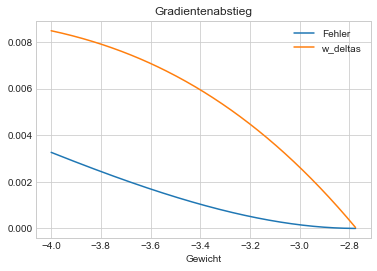

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def func_id(x):
  return x

def func_sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Initialisierungen
x = 0.5
y = 0.2
# Lernrate
eta = 1
# Startgewicht
weight = -4.0
# Für den Plot
weights = []
errors = []
w_deltas = []

# Tabelle erzeugen
# Überschrift
print("Input x = {:.6f}, Gewünschter Output y = {:.2f}".format(x, y))
print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t\t{}\t\t{}".format('Iter', 'x', 'w', 'net i', 'a', 'y_hat', 'y', 'E', "E'", 'w delta'))

for step in range(521):
  # Net input berechnen
  net_i = weight * x
  # Aktivierung (identische Funktion)
  # activation = func_id(net_i)
  activation = func_sigmoid(net_i)
  # Errechneter Output
  y_hat = activation
  # Quadratischer Fehler
  error = 0.5 * (y - y_hat)**2
  # Gradient
  # derivative = -x * (y - y_hat)
  derivative = -activation * (1.0 - activation) * (y - y_hat)
  # Delta für Gewichtsanpassung
  w_delta = -derivative * eta
  # Daten für den Plot
  weights.append(weight)
  errors.append(error)
  w_deltas.append(w_delta)
  # Ausgabe der Änderungen alle 10 Schritte
  if step % 10 == 0:
    print("{}\t{}\t{:6.2f}\t{:5.2f}\t{:5.2f}\t{:5.2f}\t{:.2f}\t{:.6f}\t{:.6f}\t{:.6f}"
      .format(
        step, x, weight, net_i, activation, y_hat, y, error, derivative, w_delta
      )
    )
  # Dafür machen wir das alles: Gewichtsanpassung = Lernen
  weight += w_delta

# Plot erzeugen
fig, ax1 = plt.subplots()
ax1.plot(weights, errors, label="Fehler")
ax1.plot(weights, w_deltas, label="w_deltas")
ax1.set_title('Gradientenabstieg')
ax1.legend(loc='best', fancybox=True, framealpha=0.5)
plt.style.use('seaborn-whitegrid')
plt.xlabel('Gewicht')
plt.show()

### Vorwärts-Delta und Rückwärts-Propagation

n_hidden = Zeilen: 3
n_input = Spalten: 2
W_IH: [[ -0.251   0.901   0.464]
 [  0.197  -0.688  -0.688]
 [ -0.884   0.732   0.202]
 [  0.416  -0.959   0.940]]
Multi-Layer-Perceptron - Netzwerkarchitektur
[[  1.000   1.000   1.000   1.000   1.000]
 [  0.000   0.000   0.000   0.000   0.000]
 [  0.000   0.000   0.000   0.000   0.000]]
----------v----------
[[  4.386 -10.500  29.568]
 [ -2.298  -4.524   4.277]
 [ -0.919   0.897  -0.226]
 [  3.108  -5.704   5.594]]
----------v----------
[[  1.000   1.000   1.000   1.000  -0.013]
 [ -2.298   0.091   0.091   0.083  -0.002]
 [ -0.919   0.285   0.285   0.204   0.000]
 [  3.108   0.957   0.957   0.041   0.001]]
----------v----------
[[  0.665  -0.575  -0.636  -0.633]
 [  3.141   7.021  -0.196  -6.634]]
----------v----------
[[  0.000   0.000   0.000   0.000   0.000]
 [ -2.624   0.068   0.068   0.063  -0.004]]
----------v----------
Predict:
[1 1 1] 0 -> [  0.060]
[1 0 1] 1 -> [  0.933]
[1 1 0] 1 -> [  0.930]
[1 0 0] 0 -> [  0.068]


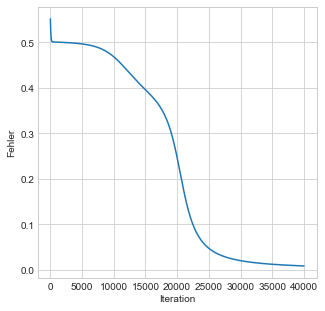

In [16]:
import numpy as np
from sklearn.utils.validation import check_random_state
import matplotlib.pyplot as plt
%matplotlib inline

def func_id(x):
  return x

def func_sigmoid(x):
  """ Die Sigmoid-Funktion als Aktivierungsfunktion """
  return 1.0 / (1.0 + np.exp(-x))

def func_relu(x):
  return np.maximum(0, x)

class MLP(object):
  """ Das mehrschichtige Perceptron (MLP) """
  def __init__(
    self,
    n_input_neurons=2,
    n_hidden_neurons=3,
    n_output_neurons=1,
    weights=None,
    eta=0.01,
    n_iterations=10,
    random_state=2,
    *args, **kwargs
  ):
    """ Initialisierung des Netzwerks
    Wir verwenden eine fixe I-H-O-Struktur für den Anfang:
    (Input-Hidden-Output)
    Die Anzahl der Neuronen ist flexibel
    Zusätzlich ist es möglich, das Netzwerk mit Gewichten zu
    initialisieren (W_IH, W_HO)
    """
    # Aktivierungs- und Output-Funktion
    self.f_akt = func_sigmoid
    self.g_out = func_id
    # Anzahl der Neuronen pro Layer
    self.n_input_neurons = n_input_neurons
    self.n_hidden_neurons = n_hidden_neurons
    self.n_output_neurons = n_output_neurons
    # Gewichtsinitialisierung
    self.weights = weights
    W_IH = []
    W_HO = []
    # Lernrate
    self.eta = eta
    # Anzahl Iterationen
    self.n_iterations = n_iterations
    # Für den Zufallsgenerator
    self.random_state = random_state
    random_state = check_random_state(self.random_state)
    # Fehler beim fit
    self.errors = []
    # Hier werden alle Daten zur Netzberechnung abgelegt
    self.network = []
    # Input-Layer + Bias-Neuron: Spalten = n
    # net_i, a_i, o_i, d_i, delta_i
    self.inputLayer = np.zeros((self.n_input_neurons + 1, 5))
    # Bias-Neuron-Output ist immer 1
    self.inputLayer[0] = 1.0
    # Den Input-Layer zum Netzwerk hinzufügen
    self.network.append(self.inputLayer)
    # Weights vom Input-Layer zum Hidden-Layer W_IH
    # Neuron: Zeile x Spalten: Zeilen = # Hidden, Spalten = # Input
    # Nur initialisieren, falls tatsächlich Gewichte vorhanden
    if weights:
      W_IH = self.weights[0]
    else:
      W_IH = 2 * random_state.random_sample((self.n_hidden_neurons + 1, self.n_input_neurons + 1)) - 1
    self.network.append(W_IH)
    print('n_hidden = Zeilen:', n_hidden_neurons + 1)
    print('n_input = Spalten:', n_input_neurons + 1)
    print("W_IH:", W_IH)
    # Hidden-Layer + Bias-Neuron: Spalten = net_i, a_i, o_i, d_i, delta_i
    self.hiddenLayer = np.zeros((self.n_hidden_neurons + 1, 5))
    # Bias-Neuron-Output ist immer 1
    self.hiddenLayer[0] = 1.0
    # Den Hidden-Layer zum Netzwerk hinzufügen
    self.network.append(self.hiddenLayer)
    # Weights von Hidden-Layer zum Output-Layer
    # Neuron: Zeile x Spalten: Zeilen = # Output, Spalten = # Hidden
    if weights:
      W_HO = self.weights[1]
    else:
      W_HO = 2 * random_state.random_sample((self.n_output_neurons + 1, self.n_hidden_neurons + 1)) - 1
    self.network.append(W_HO)
    # Output-Layer + Bias-Neuron: Spalten = net_i, a_i, o_i, d_i, delta_i
    self.outputLayer = np.zeros((self.n_output_neurons + 1, 5))
    # Bias-Neuron-Output = 0, da nicht relevant
    # Nur wegen einheitlicher Indizierung vorhanden
    self.outputLayer[0] = 0.0
    # Den Output-Layer zum Netzwerk hinzufügen
    self.network.append(self.outputLayer)

  def print(self):
    print('Multi-Layer-Perceptron - Netzwerkarchitektur')
    # Insgesamt 7 Stellen, mit 3 Nachkommastellen ausgeben
    np.set_printoptions(formatter={'float': lambda x: "{0:7.3f}".format(x)})
    for nn_part in self.network:
      print(nn_part)
      print('----------v----------')

  def predict(self, x):
    """ Für Eingabe x wird Ausgabe y_hat berechnet
    Für den Vektor x wird eine Vorhersage berechnet und die Matrizenwerte
    der Layer (nicht Gewichte) werden angepasst
    """
    ########
    # Input-Layer
    # Die Input-Werte setzen: Alle Zahlen, Spalte 2
    self.network[0][:, 2] = x
    ########

    ########
    # Hidden-Layer
    # Start von Zeile 1 wegen Bias-Neuron auf Indexposition 0
    # net_j = W_ij * x
    self.network[2][1:, 0] = np.dot(self.network[1][1:, :], self.network[0][:, 2])
    # a_j
    self.network[2][1:, 1] = self.f_akt(self.network[2][1:, 0])
    # o_j
    self.network[2][1:, 2] = self.g_out(self.network[2][1:, 1])
    # d_j = o_j * (1 - o_j)    (Ableitung der Sigmoide)
    self.network[2][1:, 3] = self.network[2][1:, 2] * (1 - self.network[2][1:, 2])
    ########

    ########
    # Output-Layer
    # Start von Zeile 1 wegen Bias-Neuron auf 0
    # net_k = W_jk * h
    self.network[4][1:, 0] = np.dot(self.network[3][1:, :], self.network[2][:, 2])
    # a_k
    self.network[4][1:, 1] = self.f_akt(self.network[4][1:, 0])
    # o_k
    self.network[4][1:, 2] = self.g_out(self.network[4][1:, 1])
    # d_k = o_k * (1 - o_k)    (Ableitung der Sigmoide)
    self.network[4][1:, 3] = self.network[4][1:, 2] * (1 - self.network[4][1:, 2])
    ########

    # Rückgabe Output-Vektor
    return self.network[4][:, 2]

  def fit(self, X, Y):
    """ Lernen """
    # Gewichtsänderungen
    delta_w_jk = []
    delta_w_ij = []
    # Fehler
    self.errors = []
    # Alle Iterationen
    for iteration in range(self.n_iterations):
      # Für alle Trainingsbeispiele
      error = 0.0
      for x, y in zip(X, Y):
        #########
        # Vorwärtspfad
        y_hat = self.predict(x)
        # Differenz
        diff = y - y_hat
        # Quadratischer Fehler
        error += 0.5 * np.sum(diff * diff)
        # Für eine kompaktere Notation
        net = self.network
        #########
        # Output-Layer
        # delta_k in der Output-Schicht = d_k * diff
        net[4][:, 4] = net[4][:, 3] * diff
        #########
        # Hidden Layer
        # delta_j = in der Hidden-Schicht = d_j * dot(W_kj^T, delta_k)
        net[2][:, 4] = net[2][:, 3] * np.dot(net[3][:].T, net[4][:, 4])
        #########
        # Gewichtsdeltas von W_kj
        # delta_w = eta * delta_k * o_j^T
        delta_w_jk = self.eta * np.outer(net[4][:, 4], net[2][:, 2].T)
        # Gewichtsdeltas von W_ji
        # delta_w = eta * delta_j * o_i^T
        delta_w_ij = self.eta * np.outer(net[2][:, 4], net[0][:, 2].T)
        #########
        # Gewichte anpassen
        net[1][:, :] += delta_w_ij
        net[3][:, :] += delta_w_jk
      # Sammeln des Fehlers für alle Beispiele
      self.errors.append(error)

  def plot(self):
    """ Ausgabe des Fehlers
    Die im Fehlerarray gespeicherten Fehler als Grafik ausgeben
    """
    fignr = 1
    plt.figure(fignr, figsize=(5, 5))
    plt.plot(self.errors)
    plt.style.use('seaborn-whitegrid')
    plt.xlabel('Iteration')
    plt.ylabel('Fehler')


def main():
  # Initialisierung der Trainingsbeispiele
  X = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0]])
  Y = np.array([[0, 0], [0, 1], [0, 1], [0, 0]])
  # Netzwerk initialisieren
  nn = MLP(eta=0.02, n_iterations=40000, random_state=42)

  # Trainieren des Netzes und Ausgabe nach dem Trainieren
  nn.fit(X, Y)
  nn.print()
  nn.plot()

  # Testen der Vorhersage des Trainingsdatensatzes
  print('Predict:')
  for x, y in zip(X, Y):
    print('{} {} -> {}'.format(x, y[1], nn.predict(x)[1:2]))

main()